### Displacement near Stadium Development: Building Footprint in Inglewood, CA

In this assignment I will be further exploring the city of Inglewood by looking at the current building types in Inglewood based on osm data. With this library, I will be able to map the current building footprint in the City of Inglewood. My project partner and I are intersted in looking at the impact that SoFi stadium has had and that will include changes in the city's building footprint. We will compare the latest building footprint with the building footprint prior to the development of SoFi stadium. This way we can compare both years and visualize the changes that have occurred after SoFi Stadium broke ground. 

We will be using census data at a later time to compliment our findings to see if the changes we see in the built environment are also reflected in the population. 

In [1]:
import osmnx as ox

import pandas as pd

import geopandas as gpd

import contextily as ctx

### Step 1: Importing Data and Exploration
I begin by importing the libraries that I will be using for this noteboook. Now, I am able to set location of interest to the city of Inglewood.

In [2]:
address = 'Inglewood, Los Angeles, CA'

In [3]:
osm = ox.geometries_from_address(address,tags={'building':True},dist=2000)

- I now pull data from the osm library for the address and specifically get building data.

- I want to see how many rows and columns are in my data so I will run the .shape command.

In [4]:
osm.shape

(23197, 64)

- I see that I have 23197 rows and 64 columns. I now will generate a sample to view the current data frame.

In [5]:
osm.sample(10)

addr:state     building   ele gnis:county_name  \
element_type osmid                                                      
way          442340234        NaN        house  33.9              NaN   
             412232071        NaN  residential  71.0              NaN   
             442344605        NaN        house  35.2              NaN   
             408682867        NaN        house  68.4              NaN   
             412039168        NaN   commercial  55.8              NaN   
             408682903        NaN        house  71.9              NaN   
             412181262        NaN        house  79.6              NaN   
             440804153        NaN        house  50.9              NaN   
             412111977        NaN        house  55.1              NaN   
             411647145        NaN  residential  55.2              NaN   

                       gnis:feature_id gnis:import_uuid gnis:reviewed name  \
element_type osmid                                                           
way          442340234             NaN              NaN           NaN  NaN   
             412232071             NaN              NaN           NaN  NaN   
             442344605             NaN              NaN           NaN  NaN   
             408682867             NaN              NaN           NaN  NaN   
             412039168             NaN              NaN           NaN  NaN   
             408682903             NaN              NaN           NaN  NaN   
             412181262             NaN              NaN           NaN  NaN   
             440804153             NaN              NaN           NaN  NaN   
             412111977             NaN              NaN           NaN  NaN   
             411647145             NaN              NaN           NaN  NaN   

                       source  \
element_type osmid              
way          442340234    NaN   
             412232071    NaN   
             442344605    NaN   
             408682867    NaN   
             412039168    NaN   
             408682903    NaN   
             412181262    NaN   
             440804153    NaN   
             412111977    NaN   
             411647145    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          442340234  POLYGON ((-118.35742 33.94850, -118.35749 33.9...   
             412232071  POLYGON ((-118.35227 33.98096, -118.35228 33.9...   
             442344605  POLYGON ((-118.35661 33.95225, -118.35661 33.9...   
             408682867  POLYGON ((-118.32375 33.96844, -118.32375 33.9...   
             412039168  POLYGON ((-118.32440 33.97426, -118.32443 33.9...   
             408682903  POLYGON ((-118.32572 33.96707, -118.32572 33.9...   
             412181262  POLYGON ((-118.33205 33.96825, -118.33205 33.9...   
             440804153  POLYGON ((-118.34606 33.97414, -118.34597 33.9...   
             412111977  POLYGON ((-118.34364 33.97926, -118.34361 33.9...   
             411647145  POLYGON ((-118.32723 33.97584, -118.32723 33.9...   

                        ... tourism social_facility landuse description  \
element_type osmid      ...                                               
way          442340234  ...     NaN             NaN     NaN         NaN   
             412232071  ...     NaN             NaN     NaN         NaN   
             442344605  ...     NaN             NaN     NaN         NaN   
             408682867  ...     NaN             NaN     NaN         NaN   
             412039168  ...     NaN             NaN     NaN         NaN   
             408682903  ...     NaN             NaN     NaN         NaN   
             412181262  ...     NaN             NaN     NaN         NaN   
             440804153  ...     NaN             NaN     NaN         NaN   
             412111977  ...     NaN             NaN     NaN         NaN   
             411647145  ...     NaN             NaN     NaN   

### Step 2: Creating a Subset from the Data 
I realize that I do not want to keep all of the columns, so I will generate the list of all the columns and determine which columns I wish to keep.

In [6]:
list(osm)

['addr:state',
 'building',
 'ele',
 'gnis:county_name',
 'gnis:feature_id',
 'gnis:import_uuid',
 'gnis:reviewed',
 'name',
 'source',
 'geometry',
 'nodes',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'alt_name',
 'alt_name_1',
 'building:use',
 'height',
 'heritage',
 'lacounty:ain',
 'lacounty:bld_id',
 'leisure',
 'old_name',
 'start_date',
 'website',
 'wikidata',
 'wikipedia',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'designation',
 'shop',
 'amenity',
 'operator',
 'building:units',
 'opening_hours',
 'gnis:county_id',
 'gnis:created',
 'gnis:state_id',
 'note',
 'phone',
 'building:levels',
 'contact:phone',
 'cuisine',
 'internet_access',
 'office',
 'takeaway',
 'official_name',
 'fixme',
 'tomb',
 'layer',
 'ref',
 'religion',
 'tourism',
 'social_facility',
 'landuse',
 'description',
 'government',
 'addr:country',
 'smoking',
 'email',
 'ways',
 'type']

- I am also interested to see the datatype of each column and how many non-null counts are in each column. I can do this by running the .info() command.

In [7]:
osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 23197 entries, ('node', 368167028) to ('relation', 10326145)
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   addr:state        97 non-null     object  
 1   building          23197 non-null  object  
 2   ele               21865 non-null  object  
 3   gnis:county_name  4 non-null      object  
 4   gnis:feature_id   8 non-null      object  
 5   gnis:import_uuid  4 non-null      object  
 6   gnis:reviewed     4 non-null      object  
 7   name              26 non-null     object  
 8   source            5 non-null      object  
 9   geometry          23197 non-null  geometry
 10  nodes             23194 non-null  object  
 11  addr:city         97 non-null     object  
 12  addr:housenumber  178 non-null    object  
 13  addr:postcode     97 non-null     object  
 14  addr:street       176 non-null    object  
 15  alt_name          2 non-nul

- I know which columns I want to keep so I will generate a new variable for those columns and generate a new sample.

In [8]:
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.sample(10)

geometry  \
element_type osmid                                                          
way          443408048  POLYGON ((-118.35832 33.95926, -118.35832 33.9...   
             412110514  POLYGON ((-118.32756 33.98271, -118.32761 33.9...   
             412170035  POLYGON ((-118.33848 33.97870, -118.33845 33.9...   
             412043412  POLYGON ((-118.31903 33.94843, -118.31904 33.9...   
             411415888  POLYGON ((-118.32094 33.98055, -118.32094 33.9...   
             440809682  POLYGON ((-118.35277 33.97537, -118.35278 33.9...   
             409401816  POLYGON ((-118.35557 33.98355, -118.35563 33.9...   
             443405346  POLYGON ((-118.34488 33.96440, -118.34488 33.9...   
             440045513  POLYGON ((-118.33454 33.95457, -118.33453 33.9...   
             412148254  POLYGON ((-118.32016 33.98019, -118.32013 33.9...   

                           building  
element_type osmid                   
way          443408048  residential  
             412110514        house  
             412170035        house  
             412043412        house  
             411415888        house  
             440809682   commercial  
             409401816        house  
             443405346   commercial  
             440045513        house  
             412148254        house

- I have created a subset of the data I am interested in, and can now take a closer look at the value count for each unique building type in Inglewood.

In [9]:
osm_building_counts = osm.building.value_counts()
osm_building_counts

house           14057
residential      2851
apartments       2690
yes              1963
retail            589
commercial        371
garage            306
industrial        160
garages            89
warehouse          37
school             32
hotel              25
hospital           11
factory             4
kindergarten        3
roof                3
construction        3
church              2
stadium             1
Name: building, dtype: int64

- I can now create a new dataframe with the subset data I have created. I begin by checking what the current data frame type is.

In [10]:
type(osm_building_counts)

pandas.core.series.Series

- I see that that the current type is in pandas, so now I will create the new dataframe.

In [11]:
df_osm_building_types = pd.DataFrame(osm_building_counts)
df_osm_building_types

,building
house,14057
residential,2851
apartments,2690
yes,1963
retail,589
commercial,371
garage,306
industrial,160
garages,89
warehouse,37


- The columns are not labeled as I want them, so I need to reset the index first in order to rename them.

In [12]:
df_osm_building_types = df_osm_building_types.reset_index()
df_osm_building_types

,index,building
0,house,14057
1,residential,2851
2,apartments,2690
3,yes,1963
4,retail,589
5,commercial,371
6,garage,306
7,industrial,160
8,garages,89
9,warehouse,37


- I can now rename my columns accordingly.

In [13]:
df_osm_building_types.columns = ['building_type','count']
df_osm_building_types

,building_type,count
0,house,14057
1,residential,2851
2,apartments,2690
3,yes,1963
4,retail,589
5,commercial,371
6,garage,306
7,industrial,160
8,garages,89
9,warehouse,37


### Step 3: Plotting Data

I have a new data frame and now I want to plot this data to begin to visualize and get an idea of the building makeup in Inglewood.

<AxesSubplot:>

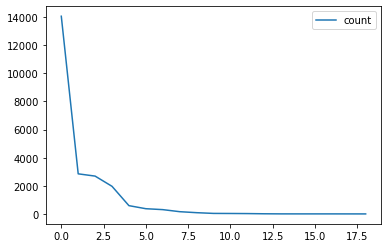

In [14]:
df_osm_building_types.plot()

- This first plot tells me the quantiy of each building type, but I cannot tell which building type is being depicted in the x-axis. I will now plot it so that each building type is depicted in the plot accordingly with the value count for each of them.

<AxesSubplot:ylabel='building_type'>

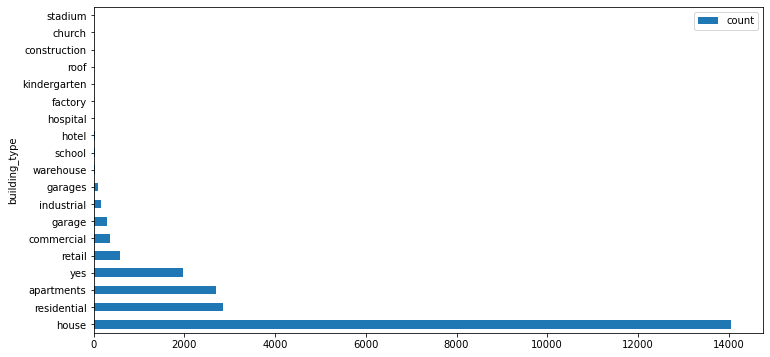

In [15]:
df_osm_building_types.plot.barh(figsize=(12,6),
                                x='building_type')

### Step 4: Mapping Building Footprint

Now I will map the data based on the subset that I created earlier in the notebook.  I first check to make sure that the data is in geodataframe so that it can create an overhead map.

In [16]:
type(osm)

geopandas.geodataframe.GeoDataFrame

- Now that the data frame in in geopandas, I can plot it on a map to visualize the building footprint in Inglewood.

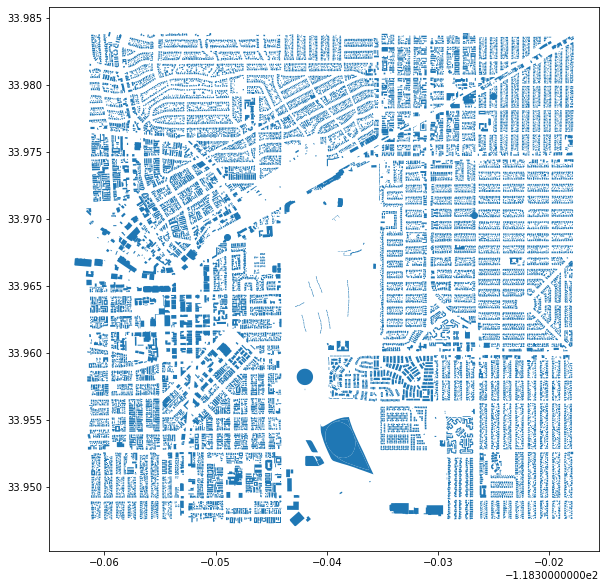

In [17]:
ax = osm.plot(figsize=(10,10))

- I have various building types within the city and the map above gives me the entire data in one color. To seperate and distinguish each building type I will plot a new map with diffirent attributes so that the data is easier to visualize.

(-118.3649468, -118.31555900000001, 33.94526431, 33.98578149)

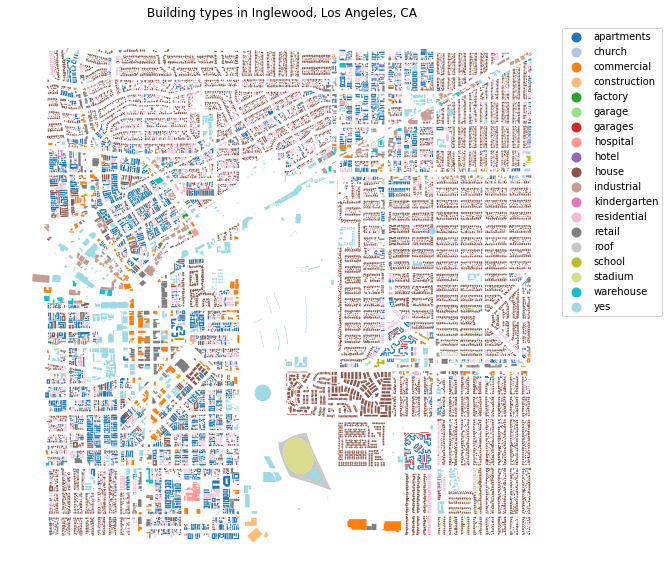

In [18]:
ax = osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.set_title('Building types in ' + address)

ax.axis('off')

### Findings

I now see what the current building footprint is for the City of Inglewood. Based on the last map, I can see that the majoroity of Inglewood's building footprint is resdiential. I can also see that the stadium is really close to the residential areas to the East. That same middle section is where the Clipper Arena is proposed to be constructed in the near future. Additionally, I can see that the corridor to the West of the Stadium is a mixture of building types including commerical spaces. It would be intersting to see how much that has changed as well. Whether the same amount commerical spaces existed before or less. I am intersted in seeing how the previous building footprint compares to the current along with the dempographic makeup of the City in those two instances.